In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import chardet
with open('/content/drive/MyDrive/sms_spam_dataset/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
sms_df = pd.read_csv('/content/drive/MyDrive/sms_spam_dataset/spam.csv',encoding='latin-1')

In [ ]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [ ]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
sms_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_df.rename(columns = {'v1':'target','v2':'text'} , inplace = True)
sms_df.sample(5)

,target,text
2987,ham,Do you still have the grinder?
2163,ham,hi my darlin im on my way to London and we hav...
4400,ham,Many times we lose our best ones bcoz we are
3787,spam,Want to funk up ur fone with a weekly new tone...
3007,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
sms_df['target'] = encoder.fit_transform(sms_df['target'])

In [ ]:
sms_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values
sms_df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
#Duplicate values
sms_df.duplicated().sum()

403

In [ ]:
sms_df = sms_df.drop_duplicates(keep = 'first')

In [ ]:
#Duplicate values
sms_df.duplicated().sum()

0

In [ ]:
sms_df.shape

(5169, 2)

EDA

In [ ]:
sms_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

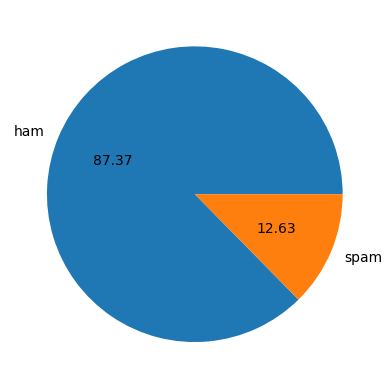

In [ ]:
plt.pie(sms_df['target'].value_counts(), labels = ('ham','spam') , autopct = '%0.2f')
plt.show()

In [ ]:
#Data is imbalanced
sms_df['num_characters'] = sms_df['text'].apply(len)

In [ ]:
import nltk
nltk.download('punkt')
sms_df['num_words'] = sms_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sms_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
sms_df['num_sentence'] = sms_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sms_df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
sms_df[sms_df['target'] == 0][['num_characters' , 'num_words' , 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
sms_df[sms_df['target'] == 1][['num_characters' , 'num_words' , 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

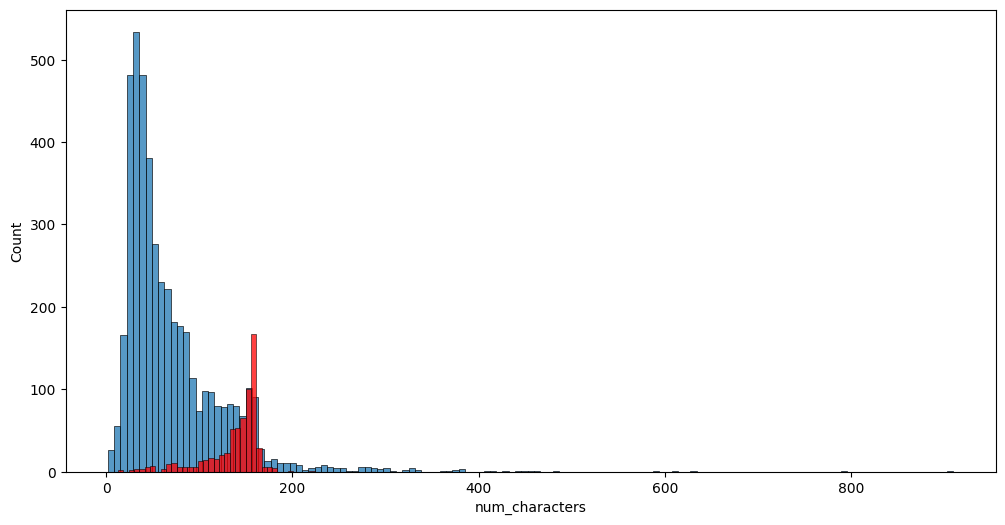

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['num_characters'])
sns.histplot(sms_df[sms_df['target'] == 1]['num_characters'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

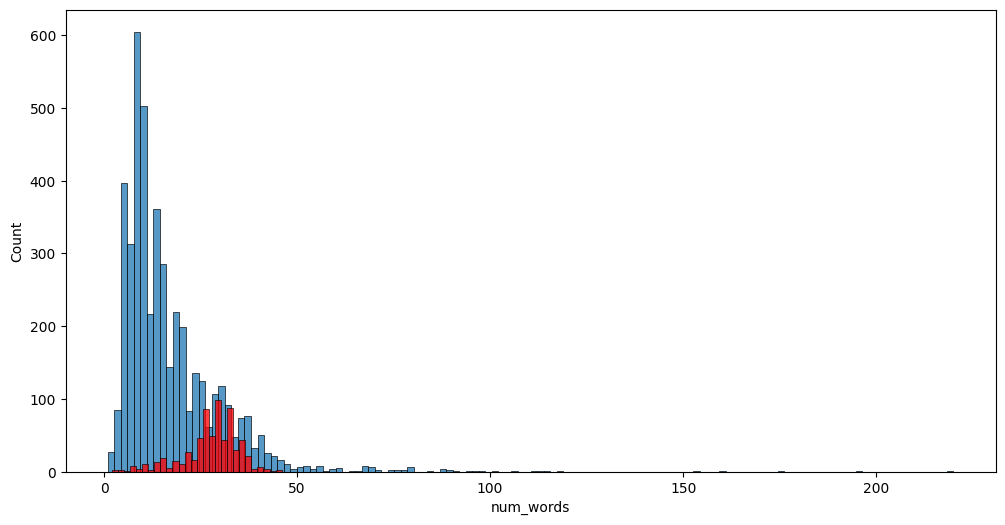

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['num_words'])
sns.histplot(sms_df[sms_df['target'] == 1]['num_words'] , color = 'red')

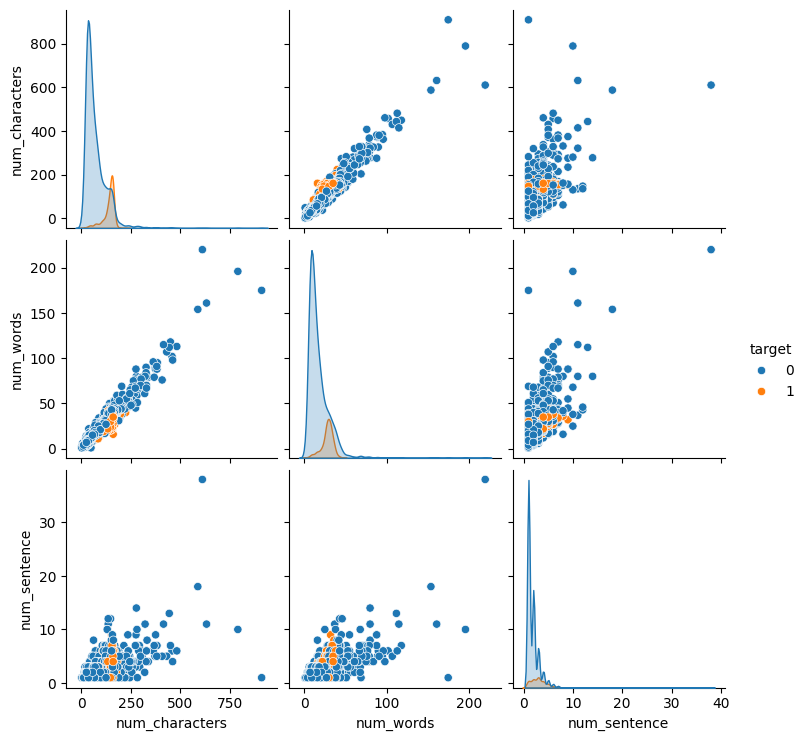

In [ ]:
sns.pairplot(sms_df, hue = 'target')

In [ ]:
print(sms_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentence    5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB
None


Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer

stopwords.words('english')
string.punctuation
ps = PorterStemmer()


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text('how aring you &8 is null )')

'are 8 null'

In [ ]:
sms_df['transformed_text'] = sms_df['text'].apply(transform_text)

In [ ]:
sms_df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [ ]:
spam_wc = wc.generate(sms_df[sms_df['target'] == 1]['transformed_text'].str.cat(sep = ''))

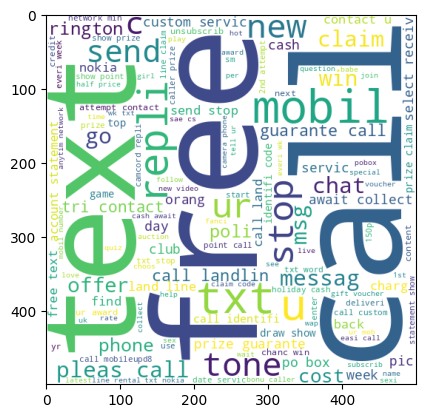

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(sms_df[sms_df['target'] == 0]['transformed_text'].str.cat(sep = ''))

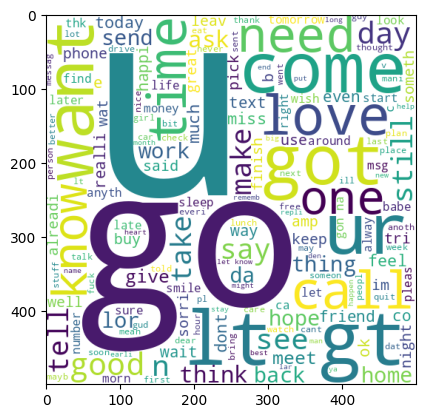

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in sms_df[sms_df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

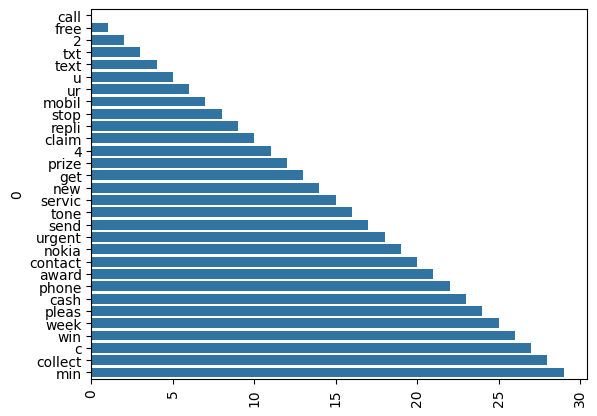

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in sms_df[sms_df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

9939

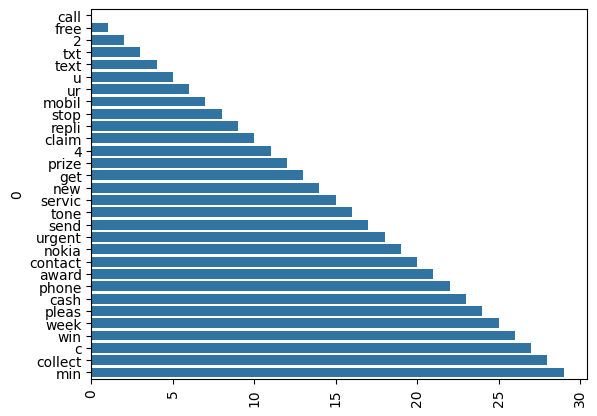

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(sms_df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = sms_df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix , precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
